# PREDICTION DE MALADIE CARDIOVASCULAIRE

##  Contexte

##  Description des métadonnées

## Importation des librairies 

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
from ipywidgets import interact
import warnings 
warnings.filterwarnings('ignore')

# Chargement du jeu de données

In [7]:
df=pd.read_excel('heart_disease.xlsx')

In [8]:
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

In [9]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


# I.ANALYSE EXPLORATOIRE DES DONNEES

-  ANALYSE DE LA FORME

In [10]:
#Nombre d'individu enquêtés
df.shape[0]

918

In [11]:
# Detection des doublons
df.duplicated().sum()

0

In [12]:
#gestion de la cohérence des modalités des variables qualitatives
df.info()
#verification du nombre de modalités par variable
for key,value in df.iteritems():
    print("{}: {}".format(key,len(df[key].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
AGE: 50
SEXE: 2
TDT: 4
PAR: 67
CHOLESTEROL: 222
GAJ: 2
ECG: 3
FCMAX: 119
ANGINE: 2
DEPRESSION : 53
PENTE: 3
CŒUR: 2


In [13]:
# Vérification de la cohérence interne des modalités des variables qualitatives

cols=df.select_dtypes(object).columns
for col in cols:
    print(df[col].value_counts())
    print('')
    print('')

homme    725
femme    193
Name: SEXE, dtype: int64


ASY    496
DNA    203
AA     173
AT      46
Name: TDT, dtype: int64


Normal    552
LVH       188
ST        178
Name: ECG, dtype: int64


Non    547
Oui    371
Name: ANGINE, dtype: int64


Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64




- variables quantitatives:

pression artérielle au repos(PAR),

âge du patient(AGE),

cholestérol sérique(CHOLESTEROL),

depression mésurée(DEPRESSION),

fréquence cardiaque maximale atteinte(FCMAX),


- variables qualitatives :

sexe du patient (SEXE),

glycémie à jeun(GAJ) variable recodé,

la pente du segment ST d'exercice de pointe(PENTE),

angine induite par l'exercice(ANGINE),

résultats de l'électrocardiogramme au repos (ECG),

type de douleur thoracique(TDT),



In [14]:
#verification du nombre de modalités par variable

for key,value in df.iteritems():
    print("{}: {}".format(key,len(df[key].unique())))

AGE: 50
SEXE: 2
TDT: 4
PAR: 67
CHOLESTEROL: 222
GAJ: 2
ECG: 3
FCMAX: 119
ANGINE: 2
DEPRESSION : 53
PENTE: 3
CŒUR: 2


In [15]:
df['CŒUR'].value_counts()

1    508
0    410
Name: CŒUR, dtype: int64

In [16]:
#observation des données manquantes

(df.isna().sum()/len(df))*100


AGE            0.0
SEXE           0.0
TDT            0.0
PAR            0.0
CHOLESTEROL    0.0
GAJ            0.0
ECG            0.0
FCMAX          0.0
ANGINE         0.0
DEPRESSION     0.0
PENTE          0.0
CŒUR           0.0
dtype: float64

<AxesSubplot:>

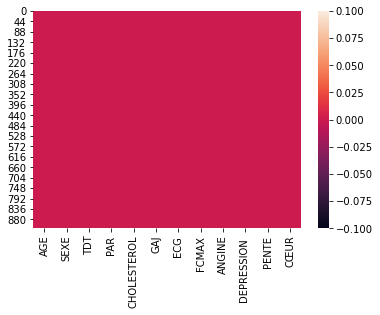

In [17]:
sb.heatmap(df.isna())

il s'agit d'un jeu de données portant sur 12 caractérisques prises sur 918 individus.
la liste des variables(caractéristiques) est susmentionnée dans le descriptif.Il n'y a aucune ligne dupliquée et aucune donnée manquantes dans le jeu de données. On distingue les variables: 

- quantitatives:

pression artérielle au repos(PAR),

âge du patient(AGE),

cholestérol sérique(CHOLESTEROL),

depression mésurée(DEPRESSION),

fréquence cardiaque maximale atteinte(FCMAX),


- qualitatives :

sexe du patient (SEXE),

glycémie à jeun(GAJ) recodée,

la pente du segment ST d'exercice de pointe(PENTE),

angine induite par l'exercice(ANGINE),

résultats de l'électrocardiogramme au repos (ECG),

type de douleur thoracique(TDT),

maladie cardiaque(COEUR) recodée .


Variable cible: COEUR.


il faut noter qu'il y a une bonne cohérence entre les modalités des variables qualitatives et quantitatives.

Aucune variable n'est constante sur l'ensemble des individus.



- ANALYSE DE FOND

In [18]:
#visualisation de la donnée cible

df['CŒUR'].value_counts(normalize=True)*100


1    55.337691
0    44.662309
Name: CŒUR, dtype: float64

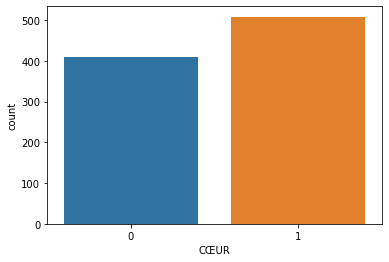

In [19]:
sb.countplot(x='CŒUR',data=df);

In [20]:
# Visualisation des variables explicatives qualitatives

In [21]:
variables_quali=['SEXE','GAJ','PENTE','ANGINE','ECG','TDT','CŒUR']

# for col in variables_quali:
    
#     fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    
#     total = float(len(df))
#     ax=sb.countplot(x=col, data=df, palette="Set3")
#     ax.set_title('Repartition des patients selon  {}'.format(col), fontsize=18)
#     ax.set_ylabel("Nombre de patients", fontsize=18);

#     for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#         x = p.get_x() + p.get_width()
#         y = p.get_height()
#         ax.annotate(percentage, (x, y), ha='center', fontsize=20)
        
#     plt.show()

#     print(120*'=')

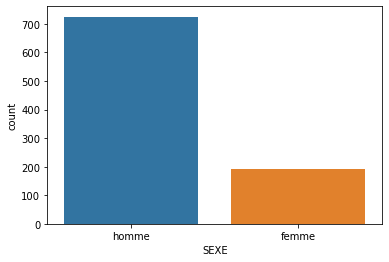

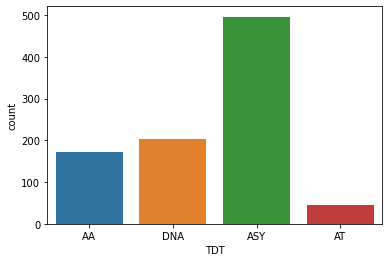

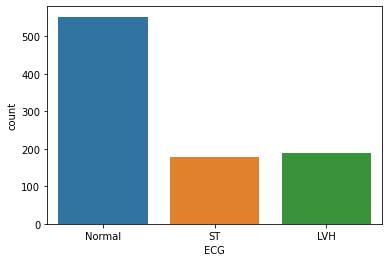

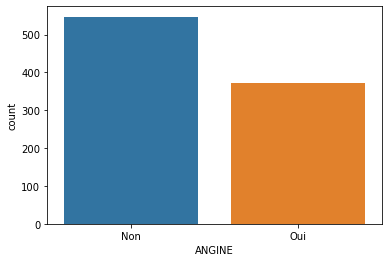

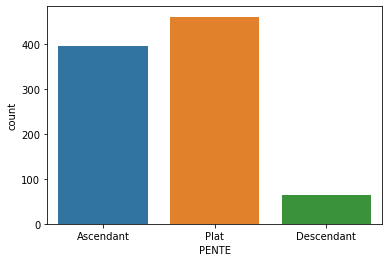

In [22]:
for col in df.select_dtypes(object):
    plt.figure()
    sb.countplot(df[col])

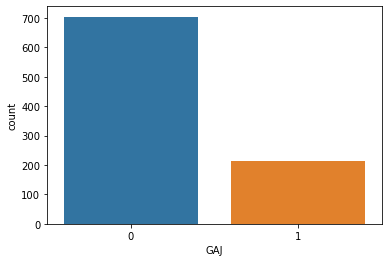

In [23]:
sb.countplot(df['GAJ']);

-  cette population d'étude a une prédominance masculine (79%)

-  la majorité des personnes présente une douleur thoracique asymptomatique(54%) et seulement 5% de ces personnes ont une 
    angine typique

-  Les personnes dont la pente du segment ST d'exercice de pointe est plat sont les plus representées(50,1%),suivi de celles dont la pente du segment ST d'exercice de pointe est ascendant(43%).

-  la plupart des personnes n'ont présenté aucune angine induite par l'exercice(63%)

-  les personnes ont présenté dans leur majorité des résultats de l'électrocardiogramme au repos normal(60,1%)

-  il y a plus de personne qui ont une glycémie à jeun inferieure ou égal à  120 mg/dl (76,7%) que de personne ayant une glycemie superieur à 120mg/dl(23,3%)

In [72]:
#  def inter(col):
#     plt.figure()
#     sb.countplot(df[col])
#     return plt.show();

In [74]:
# interact(inter,col=df);

In [24]:
# Visualisation des variables explicatives quantitatives

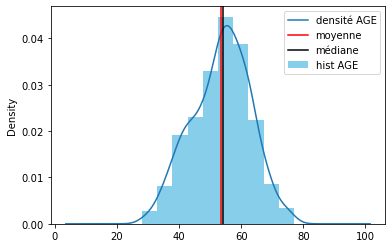

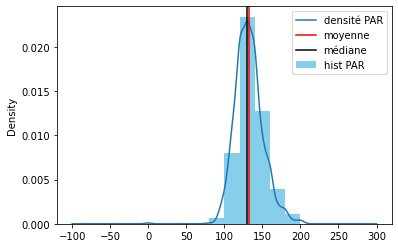

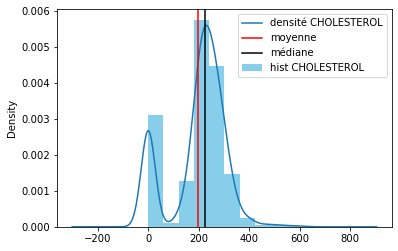

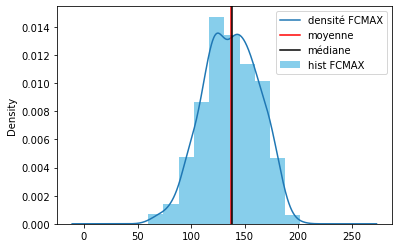

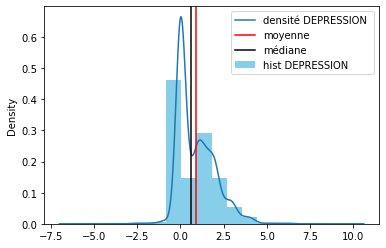

In [25]:
for col in df.select_dtypes(exclude=object):
    if col not in ["GAJ","CŒUR"]:
        plt.figure()
        plt.hist(df[col], bins=10, density=True, label= 'hist '+col, color='skyblue')
        df[col].plot(kind ="density", label = 'densité ' + col)
        plt.axvline(x = df[col].mean(), c ='r', label='moyenne')
        plt.axvline(x = df[col].median(), c ='black', label='médiane')
#         plt.axvline(x = df[col].mean(), c ='r', label='moyenne')
        plt.legend()

- Toutes les distributions des differentes variables quantitatives ne semblent pas etre normale

- On observe une distribution sensiblement symetrique pour les variables:
     fréquence cardiaque maximale atteinte(FCMAX) avec des valeurs variant de 52 à 200,
     pression artérielle au repos(PAR)(avec des valeurs variant de 58 à 198) et l'age des patients(AGE)
     (variant de 30 à 78ans)
     
- une distribution étalée vers la droite pour la variable dépression

- une distribution étalée vers la gauche pour la variable cholesterol

In [26]:
# Analyse bivariée

-  correlation entre les variables quantitatives

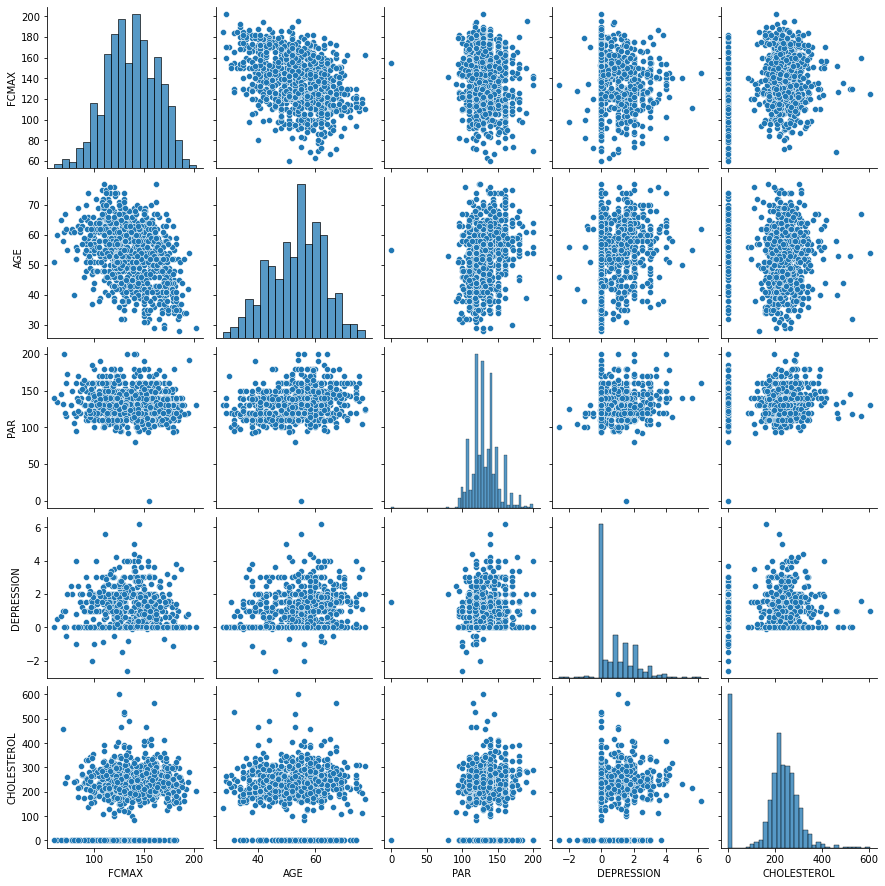

In [27]:
sb.pairplot(df[["FCMAX","AGE","PAR","DEPRESSION ","CHOLESTEROL"]]);

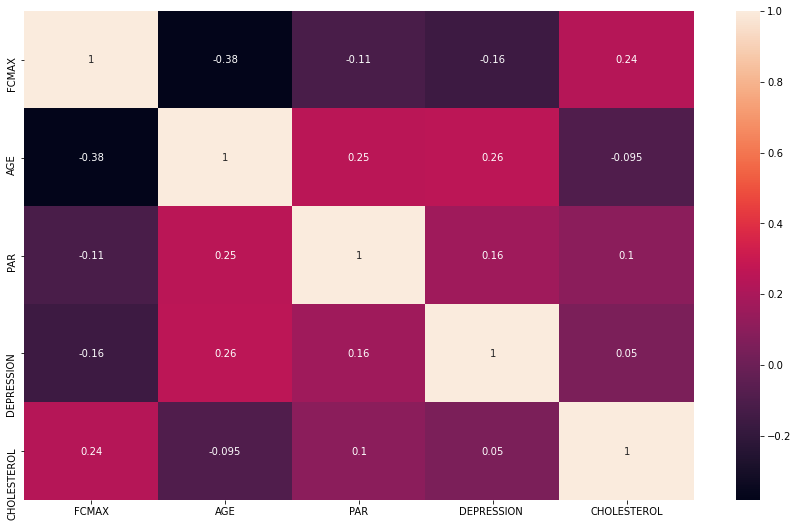

In [83]:
plt.figure(figsize=(15,9))
sb.heatmap(df[["FCMAX","AGE","PAR","DEPRESSION ","CHOLESTEROL"]].corr(), annot=True);

In [29]:
from scipy.stats import pearsonr

In [30]:
pearsonr(df["AGE"], df["FCMAX"])

(-0.3820446750319705, 2.8411217807772657e-33)

In [31]:
pearsonr(df["AGE"], df["PAR"])

(0.25439935615154485, 5.0147697437822694e-15)

In [32]:
pearsonr(df["AGE"], df["DEPRESSION "])

(0.2586115360187564, 1.7109931707675088e-15)

In [33]:
pearsonr(df["CHOLESTEROL"], df["FCMAX"])

(0.235792403002385, 4.597229278316862e-13)

- il y a une correlation négative entre l'age  et la fréquence cardiaque maximale atteinte même si celle ci n'est pas forte(lorsque la fréquence cardiaque maximale atteinte augmente l'age diminue et inversement)

- De meme on observe une faible correlation positive entre le cholesterol et la fréquence cardiaque maximale atteinte(le cholesterol augmente avec la fréquence cardiaque maximale et inversement), 

- une faible correlation positive entre age et pression artérielle au repos(PAR),age et depression 

- La corrélation entre les autres variables est quasi -inexistante.

-  Correlation entre les variables qualitatives

In [86]:
# for var1 in var_quali_cat:
    
#     for var2 in var_quali_cat:
        
#         if var1 != var2:
        
#             fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)



#             ax = sns.countplot(x=var1, hue=var2, data=df, palette="Set3")
#             ax.set_title('{} VS {}'.format(var1, var2), fontsize=18)
#             ax.set_ylabel("Nombre de {}".format(var2), fontsize=18);

In [34]:
from scipy.stats import chi2_contingency as chi2_contingency

In [35]:
for col in df.select_dtypes(object):
    if col not in 'CŒUR':
        matrice = pd.crosstab(df['CŒUR'], df[col])
        khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
        print(matrice)
        print(pval)
        print('')
        print('')

SEXE  femme  homme
CŒUR              
0       143    267
1        50    458
4.597617450809164e-20


TDT    AA  ASY  AT  DNA
CŒUR                   
0     149  104  26  131
1      24  392  20   72
8.08372842808765e-58


ECG   LVH  Normal   ST
CŒUR                  
0      82     267   61
1     106     285  117
0.0042292328167544925


ANGINE  Non  Oui
CŒUR            
0       355   55
1       192  316
2.907808387659878e-50


PENTE  Ascendant  Descendant  Plat
CŒUR                              
0            317          14    79
1             78          49   381
5.167637689470128e-78




In [36]:
matrice = pd.crosstab(df['CŒUR'], df['GAJ'])
matrice

GAJ,0,1
CŒUR,,
0,366,44
1,338,170


In [37]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)

In [38]:
print(pval)

1.0573018731810034e-15


Au seuil de 1% il y a une liaison significative entre les variables qualitatives et la cible "coeur"

In [39]:
# test de liaison de chi-2 entre les variables qualitatives explicatives

In [40]:
for i in  df.select_dtypes(object):
    for j in df.select_dtypes(object):
        if i != j:
            matrice = pd.crosstab(df[i], df[j])
            khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
            print(matrice)
            print(pval)
            print('')
            print('')

TDT     AA  ASY  AT  DNA
SEXE                    
femme   60   70  10   53
homme  113  426  36  150
4.880336281360552e-08


ECG    LVH  Normal   ST
SEXE                   
femme   47     118   28
homme  141     434  150
0.08912244139807841


ANGINE  Non  Oui
SEXE            
femme   150   43
homme   397  328
1.2387163558796499e-08


PENTE  Ascendant  Descendant  Plat
SEXE                              
femme        111           7    75
homme        284          56   385
1.83174739624214e-05


SEXE  femme  homme
TDT               
AA       60    113
ASY      70    426
AT       10     36
DNA      53    150
4.8803362813605374e-08


ECG  LVH  Normal   ST
TDT                  
AA    23     123   27
ASY  102     284  110
AT    16      22    8
DNA   47     123   33
0.0035967809057594643


ANGINE  Non  Oui
TDT             
AA      156   17
ASY     199  297
AT       40    6
DNA     152   51
1.2659099121635848e-38


PENTE  Ascendant  Descendant  Plat
TDT                               
AA        

In [41]:
for col in df.select_dtypes(object):
    if col not in 'GAJ':
        matrice = pd.crosstab(df['GAJ'], df[col])
        khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
        print(matrice)
        print(pval)
        print('')
        print('')

SEXE  femme  homme
GAJ               
0       167    537
1        26    188
0.00039659385688841134


TDT   AA  ASY  AT  DNA
GAJ                   
0    154  355  33  162
1     19  141  13   41
2.8819665653307156e-05


ECG  LVH  Normal   ST
GAJ                  
0    146     441  117
1     42     111   61
0.0004947858901824468


ANGINE  Non  Oui
GAJ             
0       431  273
1       116   98
0.07976859509438532


PENTE  Ascendant  Descendant  Plat
GAJ                               
0            334          38   332
1             61          25   128
6.914947257487274e-07




INTERPRETATION

Au seuil de 1%, Il y a une liaison significative entre :
    
    -  la PENTE et GAJ(fortement liées)
    
    -  ECG et GAJ
    
    -  TDT et GAJ   (fortement liées)
    
    -  SEXE et GAJ  (fortement liées)
    
    -  TDT  et SEXE (fortement liées)
    
    -  ANGINE et SEXE (fortement liées)
    
    -  PENTE et SEXE
    
    -  ECG et TDT
    

-  Recherche de relation entre les variables quantitatives et qualitatives

In [42]:
 # Relation cible et variable quantitatives

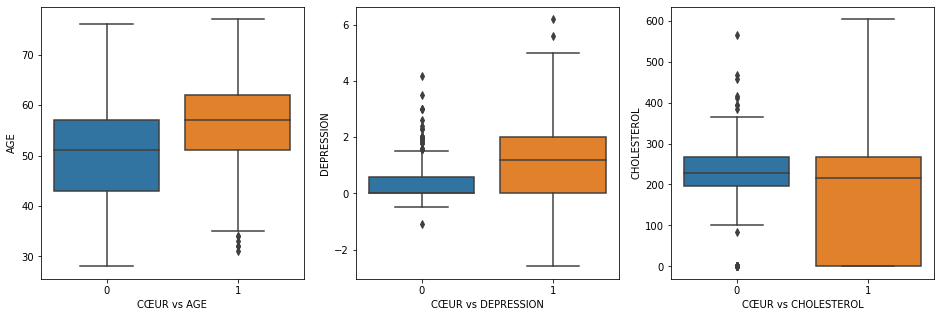

In [43]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

sb.boxplot(x='CŒUR', y='AGE', data=df,ax=ax[0])
ax[0].set_xlabel('CŒUR vs AGE')
ax[0].set_ylabel('AGE')

sb.boxplot(x='CŒUR', y='DEPRESSION ', data=df,ax=ax[1])
ax[1].set_xlabel('CŒUR vs DEPRESSION')
ax[1].set_ylabel('DEPRESSION')

sb.boxplot(x='CŒUR', y='CHOLESTEROL', data=df,ax=ax[2])
ax[2].set_xlabel('CŒUR vs CHOLESTEROL')
ax[2].set_ylabel('CHOLESTEROL');

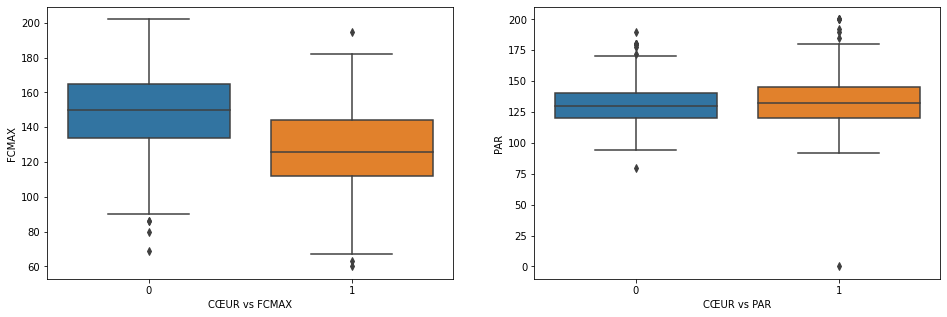

In [44]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sb.boxplot(x='CŒUR', y='FCMAX', data=df,ax=ax[0])
ax[0].set_xlabel('CŒUR vs FCMAX')
ax[0].set_ylabel('FCMAX')

sb.boxplot(x='CŒUR', y='PAR', data=df,ax=ax[1])
ax[1].set_xlabel('CŒUR vs PAR')
ax[1].set_ylabel('PAR');

In [79]:
variables_quali=['SEXE','GAJ','PENTE','ANGINE','ECG','TDT']
variables_quanti=['AGE','DEPRESSION ','CHOLESTEROL']

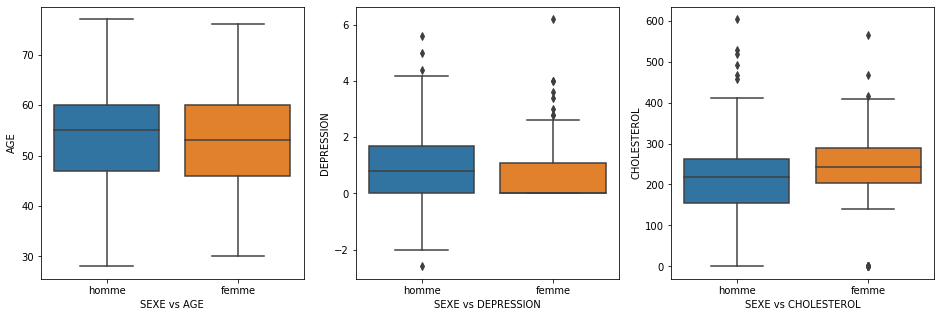

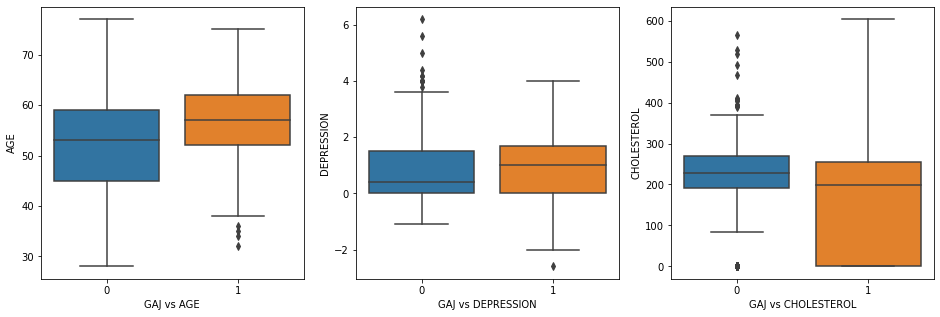

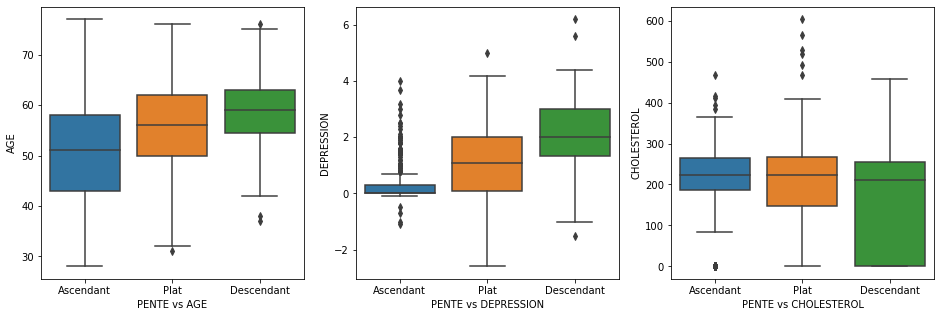

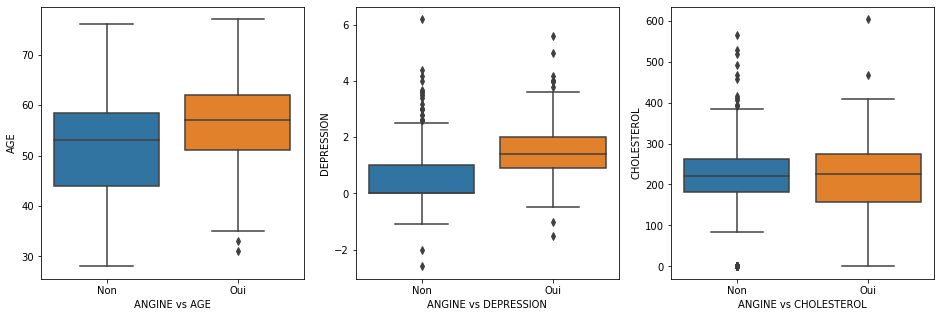

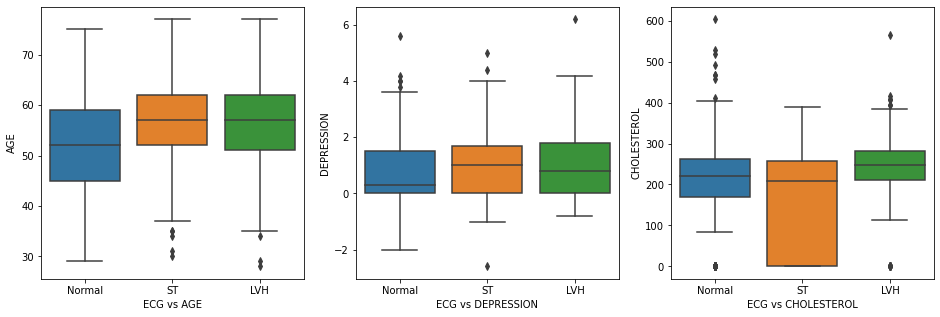

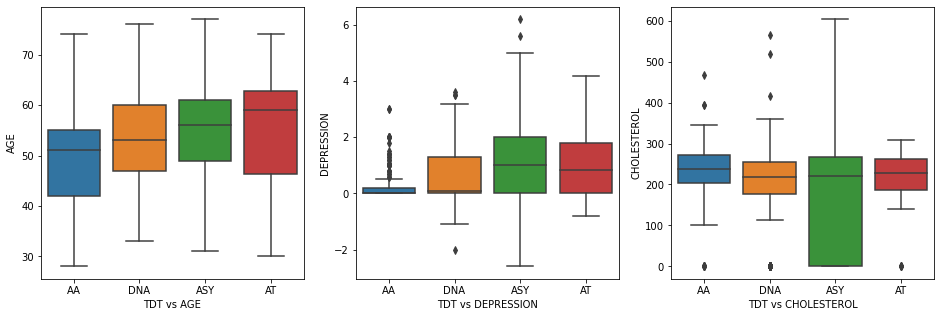

In [80]:
for var1 in variables_quali:
    fig, ax = plt.subplots(1,3,figsize=(16,5))

    sb.boxplot(x=var1, y='AGE', data=df,ax=ax[0])
    ax[0].set_xlabel('{} vs AGE'.format(var1))
    ax[0].set_ylabel('AGE')

    sb.boxplot(x=var1, y='DEPRESSION ', data=df,ax=ax[1])
    ax[1].set_xlabel('{} vs DEPRESSION'.format(var1))
    ax[1].set_ylabel('DEPRESSION')

    sb.boxplot(x=var1, y='CHOLESTEROL', data=df,ax=ax[2])
    ax[2].set_xlabel('{} vs CHOLESTEROL'.format(var1))
    ax[2].set_ylabel('CHOLESTEROL');
    

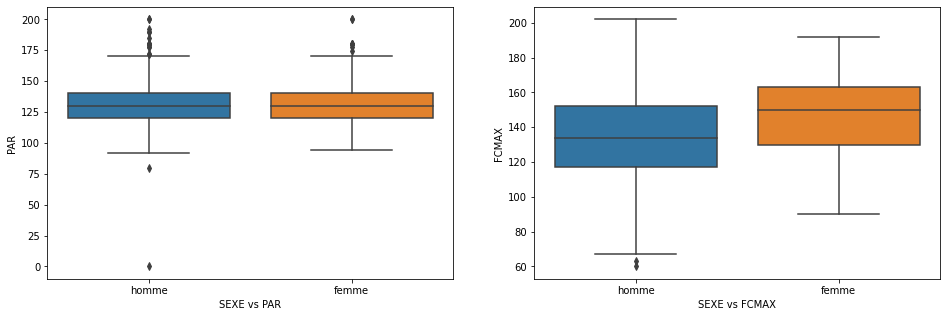

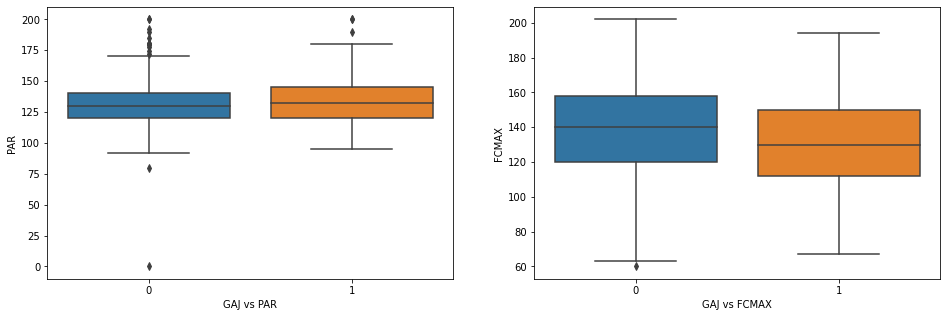

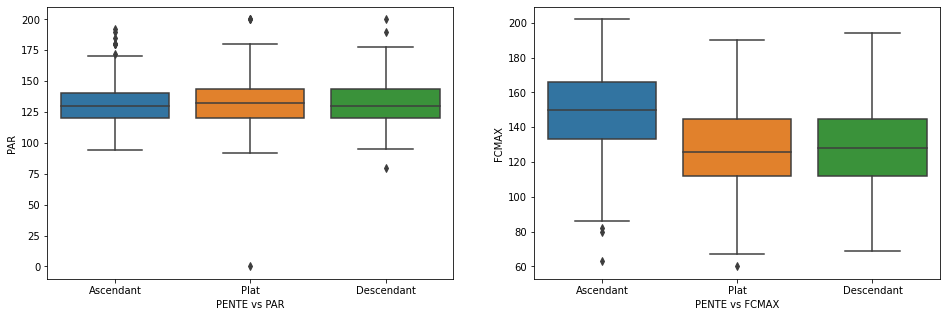

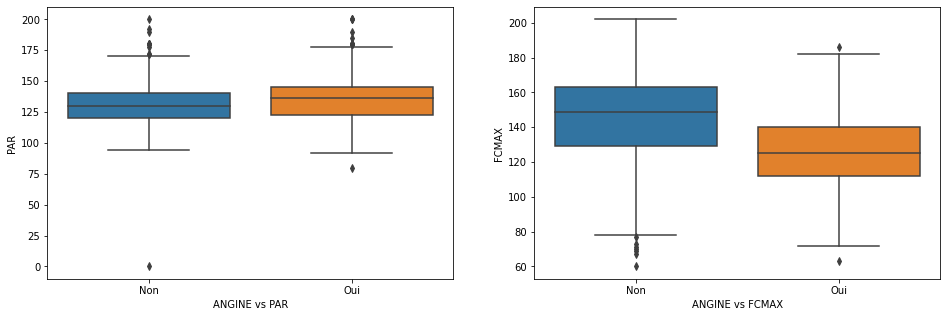

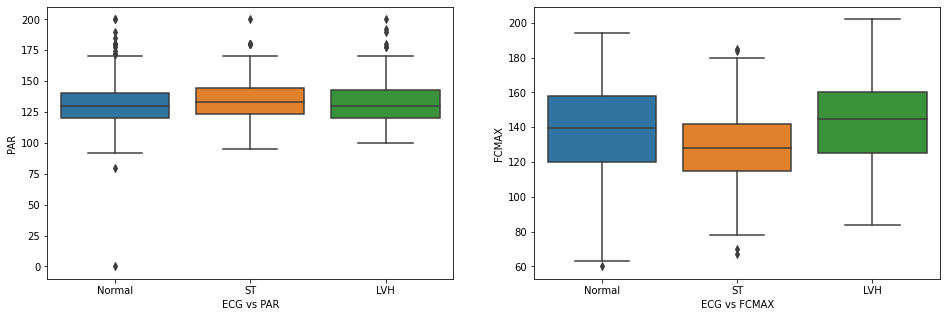

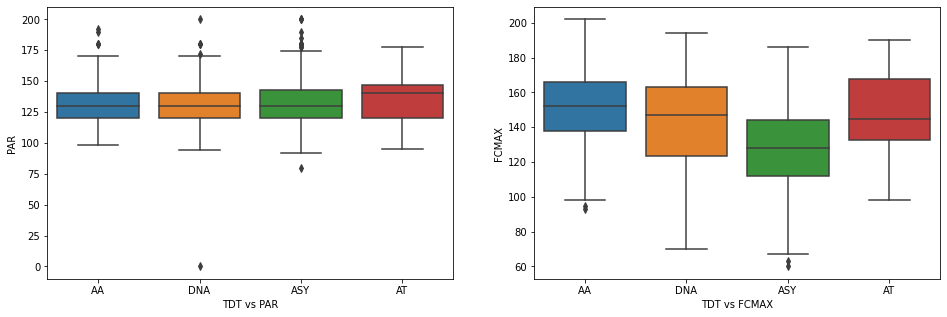

In [84]:
 for var1 in variables_quali:
    fig, ax = plt.subplots(1,2,figsize=(16,5))

    sb.boxplot(x=var1, y='PAR', data=df,ax=ax[0])
    ax[0].set_xlabel('{} vs PAR'.format(var1))
    ax[0].set_ylabel('PAR')

    sb.boxplot(x=var1, y='FCMAX', data=df,ax=ax[1])
    ax[1].set_xlabel('{} vs FCMAX'.format(var1))
    ax[1].set_ylabel('FCMAX')

Interpretation

-  il y a une difference significative entre les ages des personnes ayant des problemes cardiovasculaire et ceux qui n'en ont pas.En effet les personnes qui présentent des problemes de coeur sont en moyenne plus agées que ceux qui ne presentent pas de maladie cardio.De même pour les personnes qui ont une presence cardiaque ont de forte depression par rapport aux personnes saines.

-  En outre la fréquence maximale atteinte  chez les personnes saines est plus élevé par rapport aux personnes presentant une maladie cardiovasculaire. 

- Par ailleurs le cholesterol et la pression arterielle au repos ne sauraient expliqués la présence de maladie cardiaque
   chez les patients.

- Il n'y a pas de liason significative entre :
   
   * la pression arterielle au repos et le sexe

   * la pression arterielle et la pente
   
   * l'angine et cholesterol
   
   * sexe et depression
   
- Il y a liaison significative :
  
   * TDT et FCMAX
   * ECG et FCMAX
   * ANGINE et FCMAX
   * GAJ et FCMAX
   * SEXE et  FCMAX
   * SEXE et CHOLESTEROL
   * GAJ et AGE
   * GAJ et DEPRESSION
   * PENTE et AGE
   * PENTE et DEPRESSION 
   * PENTE et CHOLESTEROL
   
  Nous tiendrons compte de toutes ces remarques lors de la sélection des variables pour la modélisation

In [44]:
# Observation des données abérrantes

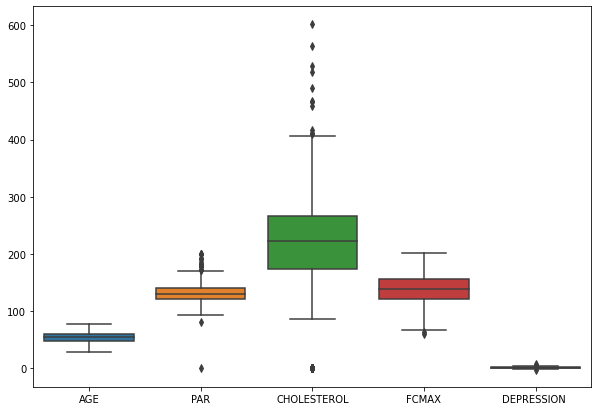

In [45]:
plt.figure(figsize=(10, 7))
sb.boxplot(data=df[[col for col in df.select_dtypes(exclude=object) if col not in ["GAJ","CŒUR"]]]);

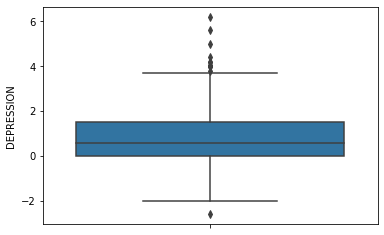

In [46]:
sb.boxplot(y='DEPRESSION ',data=df);

Parmi les variables quantitatives seule la variable age ne presente pas de données aberrantes ou extremes.
Nous verrons dans la suite comment traiter ces valeurs abérrantes.
Nous allons dans un premier temps faire la modelisation en prenant compte les valeurs abérrantes et dans un second temps nous allons essayer certaine methode de gestion de données abeerantes dans le but d'améliorer le modele dans la mesure du possible.